In [2]:
import json
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pm4py

In [3]:
#loading training data
file_train = open('D:\MEERA K S\ihc\customer_journeys_sample.json')
customer_journeys_train = json.load(file_train)
df_cust_journey_train = pd.json_normalize(customer_journeys_train)

### For test we will consider paid-social as a campaign  and will evaluate the result

In [4]:
#loading test data. 
df_cust_journey_train_paid_social = df_cust_journey_train[(df_cust_journey_train.channel_label == 'paid-social' )].groupby(['conversion_id']).agg({'conversion':'sum'})
userid = []
#Selecting records with conversion
userid.extend(df_cust_journey_train_paid_social.sort_values(by=['conversion'], ascending=False).index[0:20].tolist())
#Selecting records with no conversion
userid.extend(df_cust_journey_train_paid_social.sort_values(by=['conversion'], ascending=False).index[-15:].tolist())
output_json_for_test = [x for x in customer_journeys_train if x['conversion_id'] in userid]
df_cust_journey_test = pd.json_normalize(output_json_for_test)
df_cust_journey_test

,conversion_id,session_id,timestamp,channel_label,holder_engagement,closer_engagement,conversion
0,9ea0746f-f805-4c4f-91db-07cded9b6b75,2021-07-05_0001__6fa45471-6308-0ac5-a5a7-4e483...,2021-07-05 00:31:25,paid-social,1,1,1
1,9ea0746f-f805-4c4f-91db-07cded9b6b75,2021-07-05_0001__d4b30054-546f-76f1-0c00-68fb7...,2021-07-05 01:30:58,direct,0,1,0
2,a20b1eb1-093d-422f-a052-702415dcdeca,2021-06-21_0002__0304704f-658f-2cb9-3a28-83fed...,2021-06-21 18:42:17,paid-social,1,1,1
3,5a6abde4-3e18-4b53-87bd-279347d9d6ea,2021-07-01_0001__b22f0e9a-0ea7-554d-7b97-e3331...,2021-07-01 14:03:43,paid-social,1,1,0
4,1d55cb4b-b1a5-419c-bb17-24371e1a3455,2021-07-14_0003__7dc207ae-ae40-f42f-ec24-8a446...,2021-07-14 18:05:58,paid-social,1,1,1
...,...,...,...,...,...,...,...
194,1eba6e3a-16cc-473f-b936-59bbd6531d4a,2021-07-09_0001__6f993b28-daff-5101-4993-74fce...,2021-07-09 11:48:11,paid-social,1,1,1
195,d3487f55-5b73-4cde-a8fb-c41ea52c12ea,2021-07-22_0001__5b5c85a5-f071-3b01-5807-c5940...,2021-07-22 19:45:26,paid-social,1,1,1
196,ff9b7691-a01d-444a-8951-1d2a7a69418a,2021-05-27_0001__62bd13b2-df13-f7a6-fda8-52117...,2021-05-27 07:21:46,paid-social,0,0,0
197,ff9b7691-a01d-444a-8951-1d2a7a69418a,2021-06-29_0001__62bd13b2-df13-f7a6-fda8-52117...,2021-06-29 16:58:08,paid-social,1,1,0


# Evaluating train data

In [5]:
#taking a copy for analysis
df_cust_journey_analy = df_cust_journey_train.copy()

In [6]:
#viewing no of channels
df_cust_journey_analy.channel_label.unique()

array(['direct', 'crm', 'organic search (non-brand)',
       'organic search (brand)', 'referral', 'organic social media',
       'search-brand', 'search-other', 'paid-social', 'talent',
       'untracked', 'organic-social', 'search', 'paid-other', 'affiliate',
       'display', 'video'], dtype=object)

In [7]:
# resample data to daily
df_cust_journey_analy['timestamp'] = df_cust_journey_analy['timestamp'].astype('datetime64')
df_cust_journey_analy.set_index('timestamp', inplace=True)
df_cust_journey_analy = df_cust_journey_analy.resample('D').sum()

<Figure size 432x288 with 0 Axes>

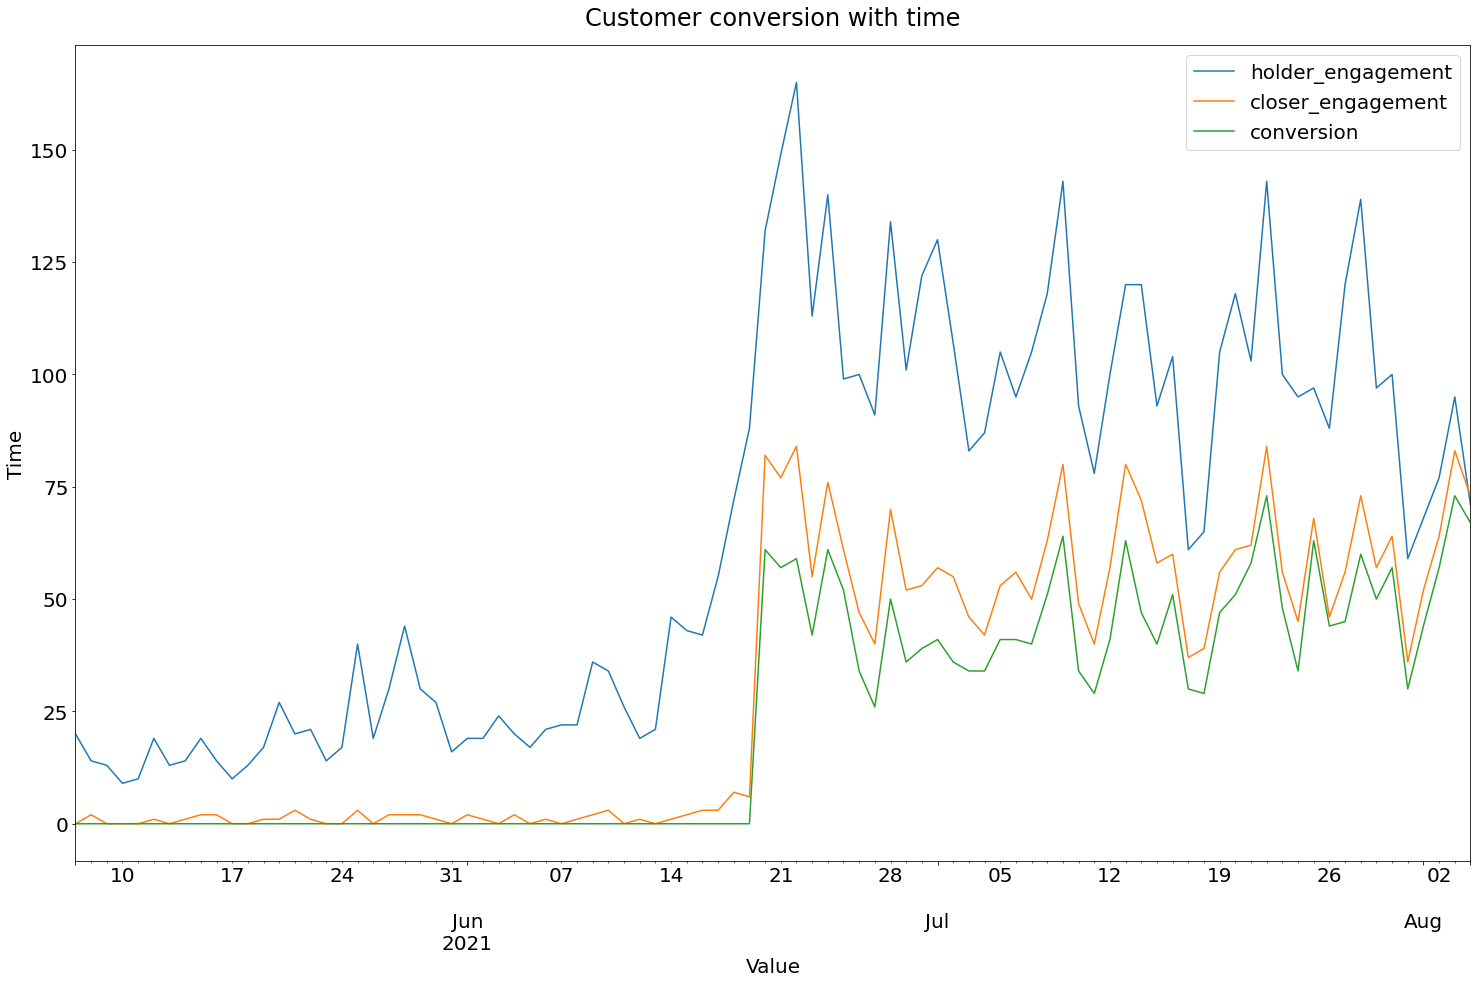

In [8]:
#Plotiing customer conversion with time
plt.figure()
ax = df_cust_journey_analy.plot(figsize=(25,15),fontsize=20)
ax.set_xlabel("Value",fontsize=20)
ax.set_ylabel("Time",fontsize=20)
ax.set_title(label='Customer conversion with time',pad=20, fontdict={'fontsize':24})
ax.legend(loc=1,fontsize=20);

### Between June 18 and 20th there was some major adversting campaign which picked up the volume

In [9]:
df_cust_journey_train['timestamp'] = df_cust_journey_train['timestamp'].astype('datetime64')

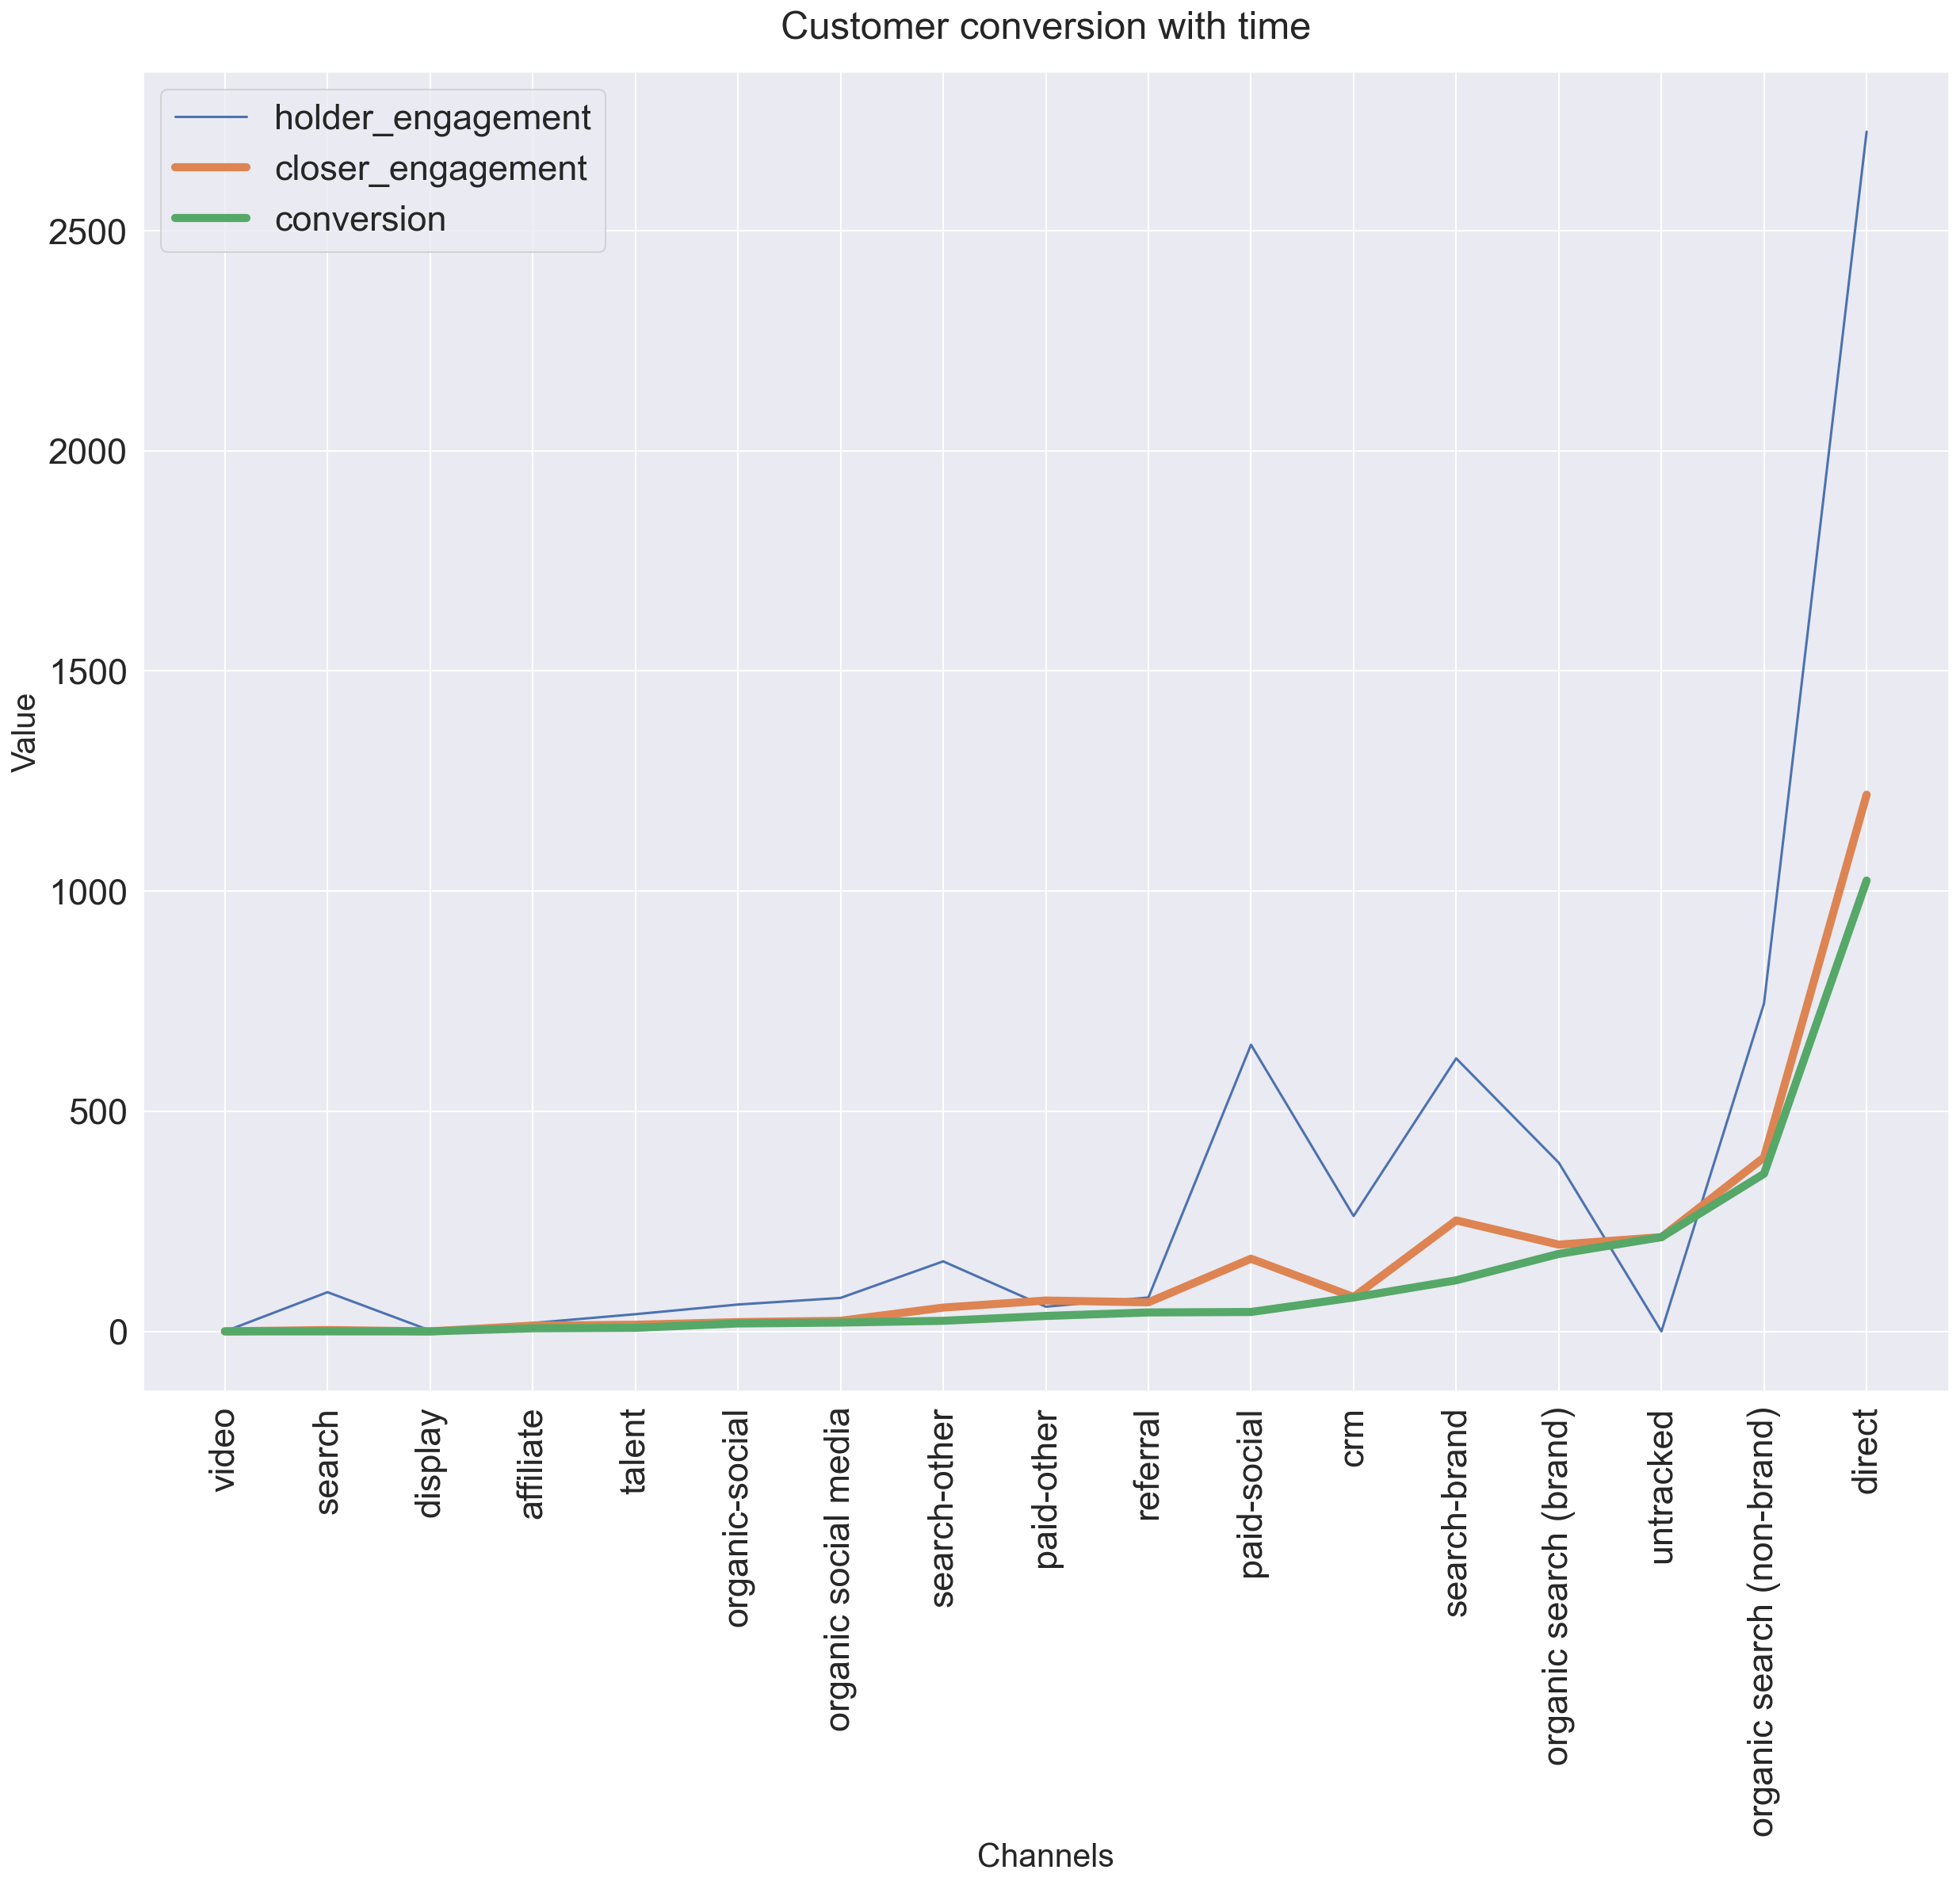

In [10]:
# which channels attributed more towards conversion, holder and close engagement
sns.set_theme(style='darkgrid', rc={'figure.dpi': 147},              
              font_scale=2)
fig, ax = plt.subplots(figsize = (20,15))
df_cust_journey_train_plt1 = df_cust_journey_train.groupby(['channel_label']).agg({'holder_engagement':'sum','closer_engagement':'sum','conversion':'sum'}).sort_values(by=['conversion'])
df_cust_journey_train_plt1 = df_cust_journey_train_plt1.reset_index()
sns.lineplot(x="channel_label", y="holder_engagement",  data=df_cust_journey_train_plt1)
sns.lineplot(x="channel_label", y="closer_engagement",  data=df_cust_journey_train_plt1, linewidth=5)
sns.lineplot(x="channel_label", y="conversion",  data=df_cust_journey_train_plt1, linewidth=5)
plt.legend(labels=["holder_engagement","closer_engagement","conversion"])
plt.xticks(rotation=90)
ax.set_xlabel("Channels",fontsize=20)
ax.set_ylabel("Value",fontsize=20)
ax.set_title(label='Customer conversion with time',pad=20, fontdict={'fontsize':24})
plt.show()

### Direct, organic search(brand), padi-social,earch-brand are the mail channels which attributed more towards incoming volume

# Analysis of Test data with process mining

In [11]:
df_cust_journey_test_pm = pm4py.format_dataframe(df_cust_journey_test, case_id='conversion_id', activity_key='channel_label', timestamp_key='timestamp')
event_log = pm4py.convert_to_event_log(df_cust_journey_test_pm )


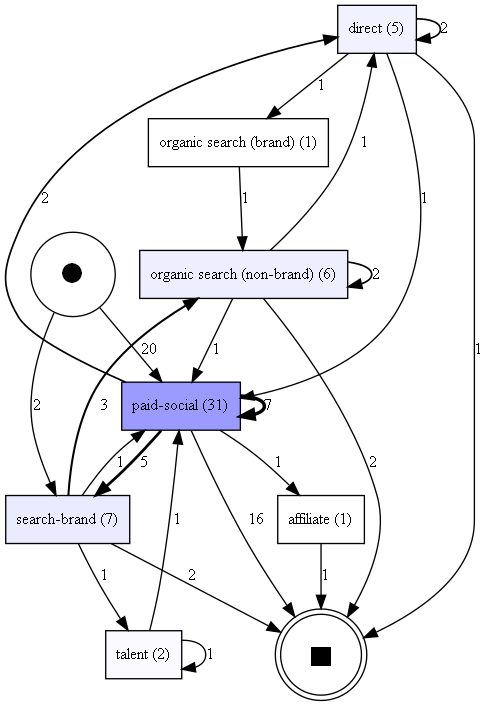

In [12]:
# finding the process sequence for top 10 variants used
variant = 10
filtered_log = pm4py.filter_variants_top_k(event_log, variant)
dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_log)
pm4py.view_dfg(dfg, start_activities, end_activities)


### A major portion of the users first started with paid-social or search-brand and finally branched out to other channels. paid -social is accessed 7 times in sucession by users

# Calling api for Testing

In [13]:
#api paramaters
api_key = 'd429ed6e-058d-433b-a736-2b26b05ea94f'
conv_type_id = 'meeratest3'
api_url = "https://api.ihc-attribution.com/v1/compute_ihc?conv_type_id={conv_type_id}".format(conv_type_id = conv_type_id)

In [14]:
#calling api for testing
body = {
    "customer_journeys": output_json_for_test
    
}

response = requests.post(
        api_url, 
        data=json.dumps(body), 
        headers= {
            "Content-Type": "application/json",    
            "x-api-key": api_key
        }
    )

results = response.json()



In [15]:
# saving the result as no of api calls is limited to 100
with open('D:\MEERA K S\ihc\customer_test_result.json', 'w') as f:
    json.dump(results['value'], f)

In [16]:
test_result = open('D:\MEERA K S\ihc\customer_test_result.json')
customer_test_result = json.load(test_result)
df_cust_journey_test_result = pd.json_normalize(customer_test_result)

In [17]:
df_cust_journey_test_result

,conversion_id,session_id,initializer,holder,closer,ihc
0,9ea0746f-f805-4c4f-91db-07cded9b6b75,2021-07-05_0001__6fa45471-6308-0ac5-a5a7-4e483...,1.0000,0.0,1.0,1.0000
1,a20b1eb1-093d-422f-a052-702415dcdeca,2021-06-21_0002__0304704f-658f-2cb9-3a28-83fed...,1.0000,0.0,1.0,1.0000
2,5a6abde4-3e18-4b53-87bd-279347d9d6ea,2021-07-01_0001__b22f0e9a-0ea7-554d-7b97-e3331...,1.0000,0.0,1.0,1.0000
3,1d55cb4b-b1a5-419c-bb17-24371e1a3455,2021-07-14_0003__7dc207ae-ae40-f42f-ec24-8a446...,1.0000,0.0,1.0,1.0000
4,32c01bf5-ddb5-4915-80c0-3b58a849c319,2021-07-20_0001__ef03120c-888e-f9d8-d22e-76600...,0.9781,0.0,0.0,0.3276
...,...,...,...,...,...,...
189,1eba6e3a-16cc-473f-b936-59bbd6531d4a,2021-07-09_0001__6f993b28-daff-5101-4993-74fce...,0.0000,1.0,1.0,0.6650
190,d3487f55-5b73-4cde-a8fb-c41ea52c12ea,2021-07-22_0001__5b5c85a5-f071-3b01-5807-c5940...,1.0000,0.0,1.0,1.0000
191,ff9b7691-a01d-444a-8951-1d2a7a69418a,2021-05-27_0001__62bd13b2-df13-f7a6-fda8-52117...,0.0000,0.0,0.0,0.0000
192,ff9b7691-a01d-444a-8951-1d2a7a69418a,2021-06-29_0001__62bd13b2-df13-f7a6-fda8-52117...,1.0000,1.0,1.0,1.0000


In [18]:
# joining with original data to get all field values
df_merge = pd.merge(df_cust_journey_train, df_cust_journey_test_result, left_on=['conversion_id','session_id'], right_on = ['conversion_id','session_id'], how='inner')

In [19]:
# taking a copy to use in analysis
df_merge_copy = df_merge.copy()

# Finding paid-social campaign distrbution and influence 

In [20]:
# No of Users
df_merge_copy['conversion_id'].nunique()

35

In [21]:
# No of Sessions
df_merge_copy['session_id'].nunique()

194

In [22]:
# Influenced conversion value  for paid-social campaign
df_merge_copy[(df_merge_copy.channel_label == 'paid-social' )].ihc.mean()


0.35324193548387095

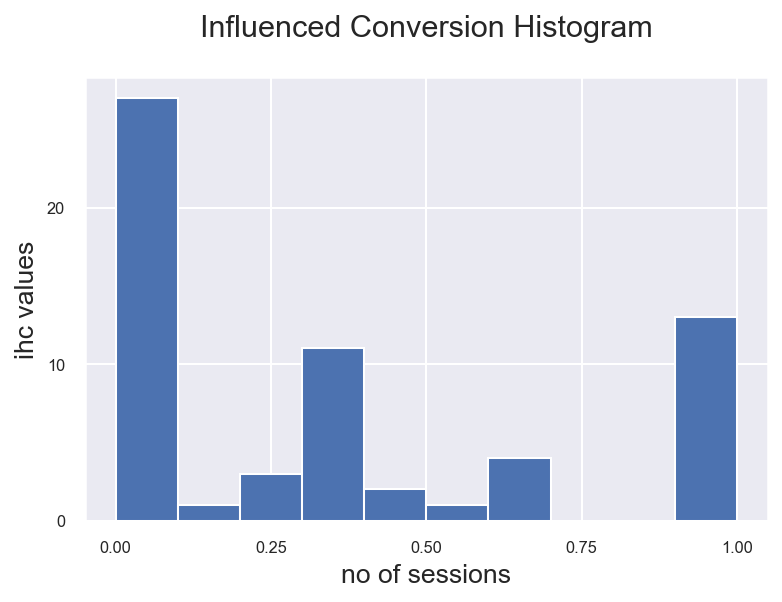

In [23]:
# Influenced conversion histogram for paid-social campaign
plt.figure()
ax = df_merge_copy[(df_merge_copy.channel_label == 'paid-social' )].ihc.hist()
ax.set_xlabel("no of sessions",fontsize=13)
ax.set_ylabel("ihc values",fontsize=13)
ax.set_title(label='Influenced Conversion Histogram',pad=20, fontdict={'fontsize':15})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### paid-social campaign is not having any major impact for around 25 times where as there has been contribution in around 11 sessions

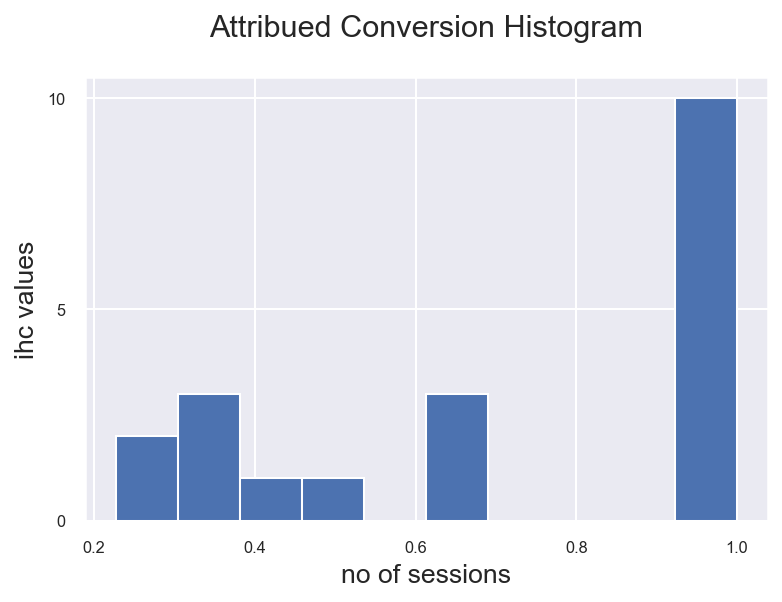

In [24]:
#attributed conversion historgram for paid-social 
plt.figure()
ax = df_merge_copy[(df_merge_copy.conversion == 1 ) & (df_merge_copy.channel_label == 'paid-social' )].ihc.hist()
ax.set_xlabel("no of sessions",fontsize=13)
ax.set_ylabel("ihc values",fontsize=13)
ax.set_title(label='Attribued Conversion Histogram',pad=20, fontdict={'fontsize':15})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### There is a high ihc attribution value  for paid-social campaign in attributed conversions

In [25]:
# Mean attribution for paid-social channel
df_merge_copy_redist = df_merge_copy[(df_merge_copy.channel_label == 'paid-social' )].groupby(['channel_label']).agg({'initializer':'mean','holder':'mean','closer':'mean','ihc':'mean'}).sort_values(by=['closer'])

In [26]:
df_merge_copy_redist_trans = df_merge_copy_redist.T
df_merge_copy_redist_trans = df_merge_copy_redist_trans.drop(['ihc']).reset_index().rename(columns={'paid-social': "value",'index':'paid-social'})


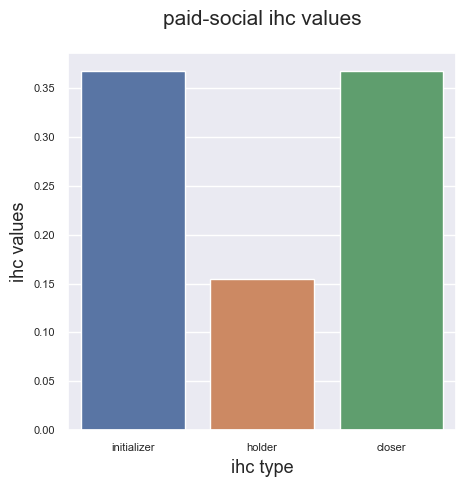

In [27]:
sns.set_theme(style='darkgrid', rc={'figure.dpi': 100},              
              font_scale=1)
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x="paid-social", y="value",  data=df_merge_copy_redist_trans)
ax.set_xlabel("ihc type",fontsize=13)
ax.set_ylabel("ihc values",fontsize=13)
ax.set_title(label='paid-social ihc values',pad=20, fontdict={'fontsize':15})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


In [28]:
# Mean attribution for paid-social channel
df_merge_copy_redist_all = df_merge_copy.groupby(['channel_label']).agg({'initializer':'mean','holder':'mean','closer':'mean'}).sort_values(by=['closer'])

<AxesSubplot:ylabel='channel_label'>

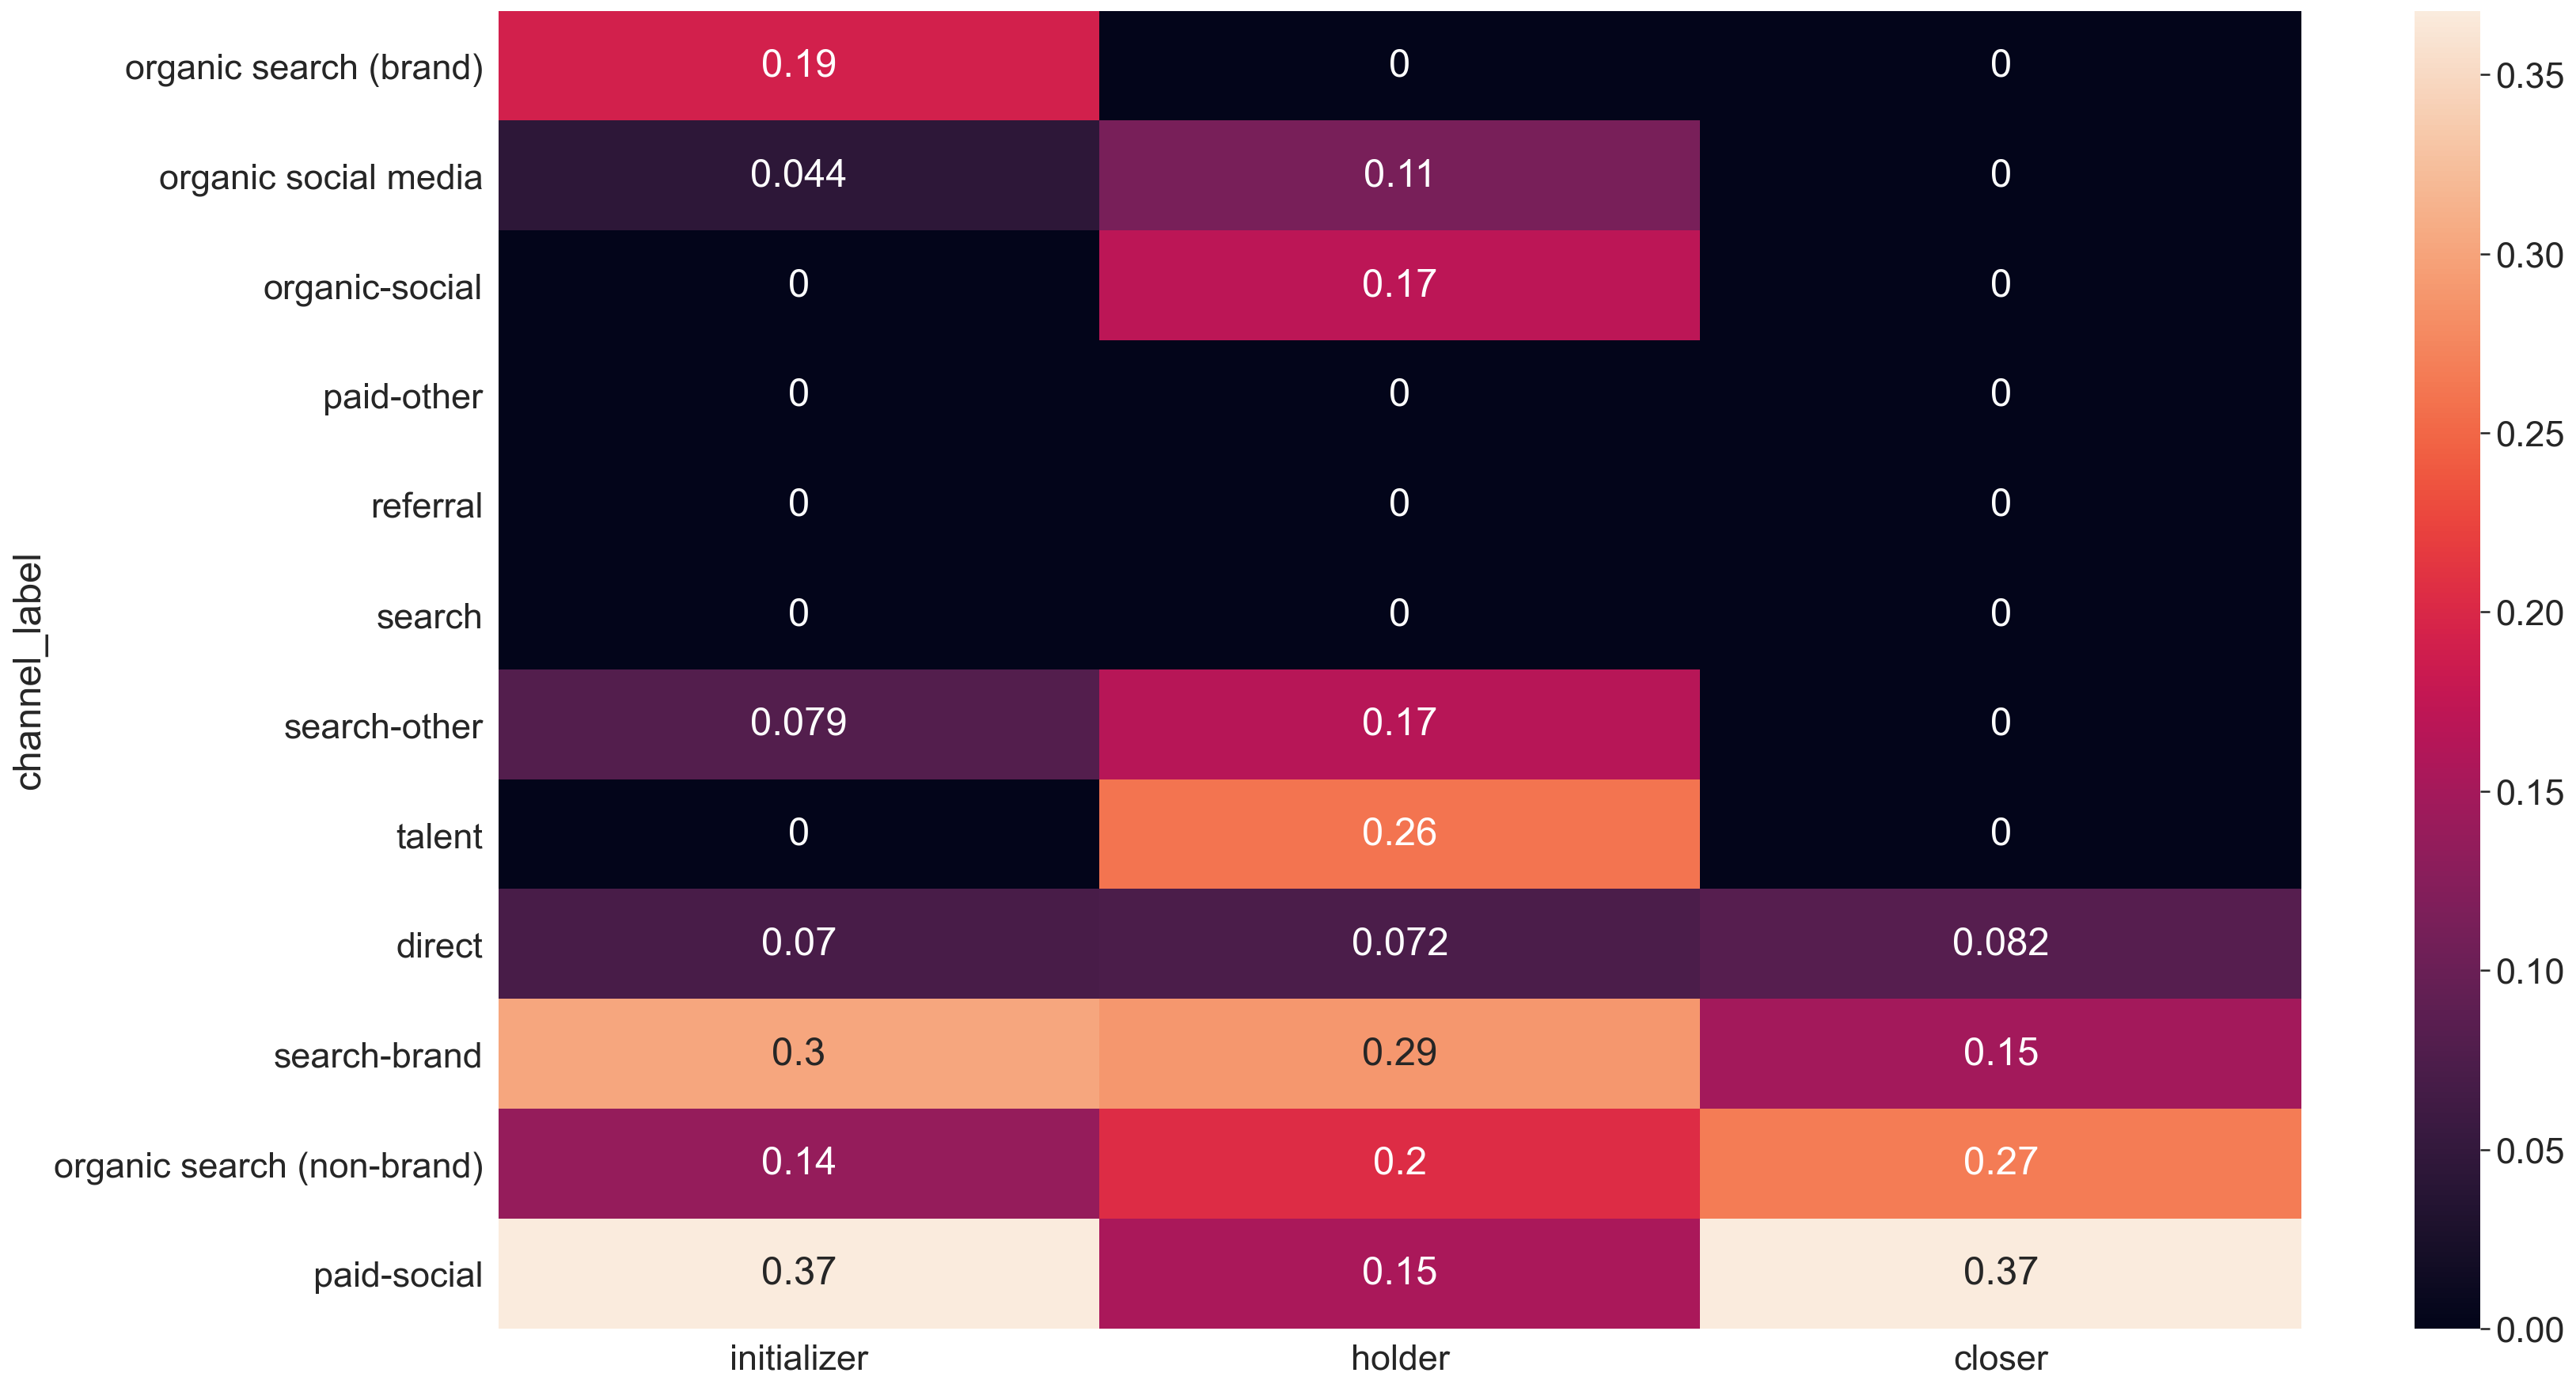

In [29]:
sns.set_theme( rc={'figure.dpi': 147},              
              font_scale=2)
fig, ax = plt.subplots(figsize = (25,15))
sns.heatmap(df_merge_copy_redist_all, annot=True)

### paid-social has higher attribution towards initiaizer and closer.Organic search(non-brand) is the second channel which contributed more after paid-social.

# Further analysis required: 
 ###   1) Use of process mining to see average time between sessions 
 ###   2) How many users stopped with paid-social channel and didnt proceed further with conversion
